In [1]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_aer

**Installing dependencies**

In [2]:
from io import BytesIO
import ipywidgets as widgets
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.quantum_info import DensityMatrix, Statevector
from qiskit.visualization import circuit_drawer, plot_state_city, plot_state_qsphere, plot_bloch_multivector, plot_state_hinton, plot_state_paulivec
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from ipywidgets import IntSlider
from IPython.display import display

**Quantum Fourier Transformation**

In [3]:
class _img:
    def __init__(self, value=None):
        self.widget = widgets.Image(format='png')
        self.value = value

    @property
    def value(self):
        return self._value

    @value.setter
    def value(self, value):
        self._value = value
        if value is None:
            return

        data = BytesIO()
        value.savefig(data, format='png', facecolor=self._value.get_facecolor())
        data.seek(0)
        self.widget.value = data.read()

class quantum_qft:
    def __init__(self, n):
        self.n = n
        self.qc = self.prepare_circuit()
        self.qc1 = self.prepare_circuit1()
        self.simulator = AerSimulator()
        self.result = None

    def scalable_circuit(self, func):
        """Makes a scalable circuit interactive. Function must take
        qc (QuantumCircuit) and number of qubits (int) as positional inputs"""
        def interactive_function(n):
            qc = QuantumCircuit(n, n)  # Include classical bits
            func(qc, n)
            return qc.draw('mpl')

        image = _img()
        n_slider = IntSlider(min=1, max=8, step=1, value=4)
        image.value = interactive_function(n_slider.value)

        def update_output(b):
            image.value = interactive_function(n_slider.value)

        n_slider.observe(update_output, names='value')
        display(n_slider)

    def swap_registers(self, qc, n):
        for qubit in range(n // 2):
            qc.swap(qubit, n - qubit - 1)
        return qc

    def qft_transform(self, qc, n):
        """Apply Quantum Fourier Transform (QFT) on the first n qubits in circuit"""
        qft = QFT(n, inverse=False)
        qc.append(qft, range(n))
        self.swap_registers(qc, n)
        return qc

    def add_measurement(self, qc):
        """Add measurement to all qubits"""
        qc.measure(range(self.n), range(self.n))
        return qc

    def prepare_circuit(self):
        qc = QuantumCircuit(self.n, self.n)  # Include classical bits for measurement
        self.qft_transform(qc, self.n)
        self.add_measurement(qc)
        return qc

    def prepare_circuit1(self):
        qc1 = QuantumCircuit(self.n)  # No classical bits needed here
        self.qft_transform(qc1, self.n)
        return qc1

    def run_simulation(self, shots=1024):
        transpiled_qc = transpile(self.qc, self.simulator)
        job = self.simulator.run(transpiled_qc, shots=shots)
        self.result = job.result()

    def run_simulation1(self, shots=1024):
        transpiled_qc = transpile(self.qc1, self.simulator)
        job = self.simulator.run(transpiled_qc, shots=shots)
        self.result = job.result()

    def get_counts(self):
        if self.result:
            counts = self.result.get_counts(self.qc)
            return counts
        else:
            raise RuntimeError("Simulation has not been run yet.")

    def plot_result(self):
        if self.result:
            counts = self.result.get_counts(self.qc)
            return plot_histogram(counts)
        else:
            raise RuntimeError("Simulation has not been run yet.")

    def psi(self):
        psi = Statevector(self.qc1)  # Ensure correct method for statevector creation
        return psi

    def get_density(self):
        psi = Statevector(self.qc1)
        return DensityMatrix(psi).draw("latex").data

    def get_city(self):
        psi = Statevector(self.qc1)
        return plot_state_city(psi)

    def get_circuit(self):
        return circuit_drawer(self.qc, output='mpl', filename='circuit.png')

    def get_hinton(self):
        psi = Statevector(self.qc1)
        return plot_state_hinton(psi)

    def get_paulivec(self):
        psi = Statevector(self.qc1)
        return plot_state_paulivec(psi)

    def get_qsphere(self):
        psi = Statevector(self.qc1)
        return plot_state_qsphere(psi)

    def get_bloch(self):
        psi = Statevector(self.qc1)
        return plot_bloch_multivector(psi)

**Running simulation with measurement**

In [4]:
simulator = quantum_qft(3)
simulator.run_simulation()

**Counts**

In [5]:
simulator.get_counts()

{'100': 139,
 '010': 120,
 '000': 116,
 '110': 135,
 '101': 129,
 '011': 120,
 '111': 136,
 '001': 129}

**Running simuation wihout measurements**

In [6]:
simulator.run_simulation1()

**Density matrix**

In [7]:
from IPython.display import display, Latex
dmatrix=simulator.get_density()
display(Latex(dmatrix))

<IPython.core.display.Latex object>

**Qsphere representation**

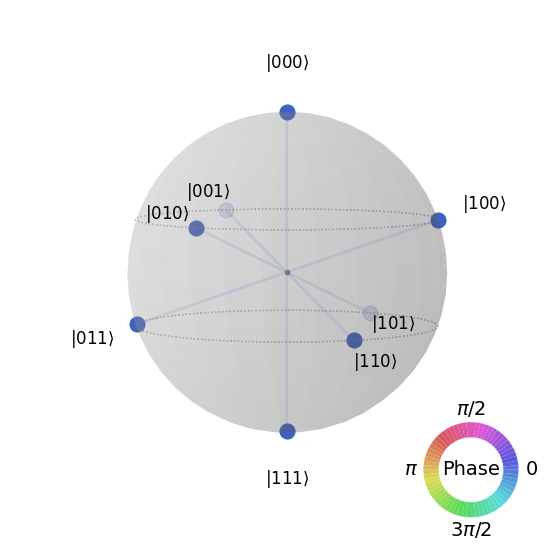

In [8]:
simulator.get_qsphere()

**City Representation**

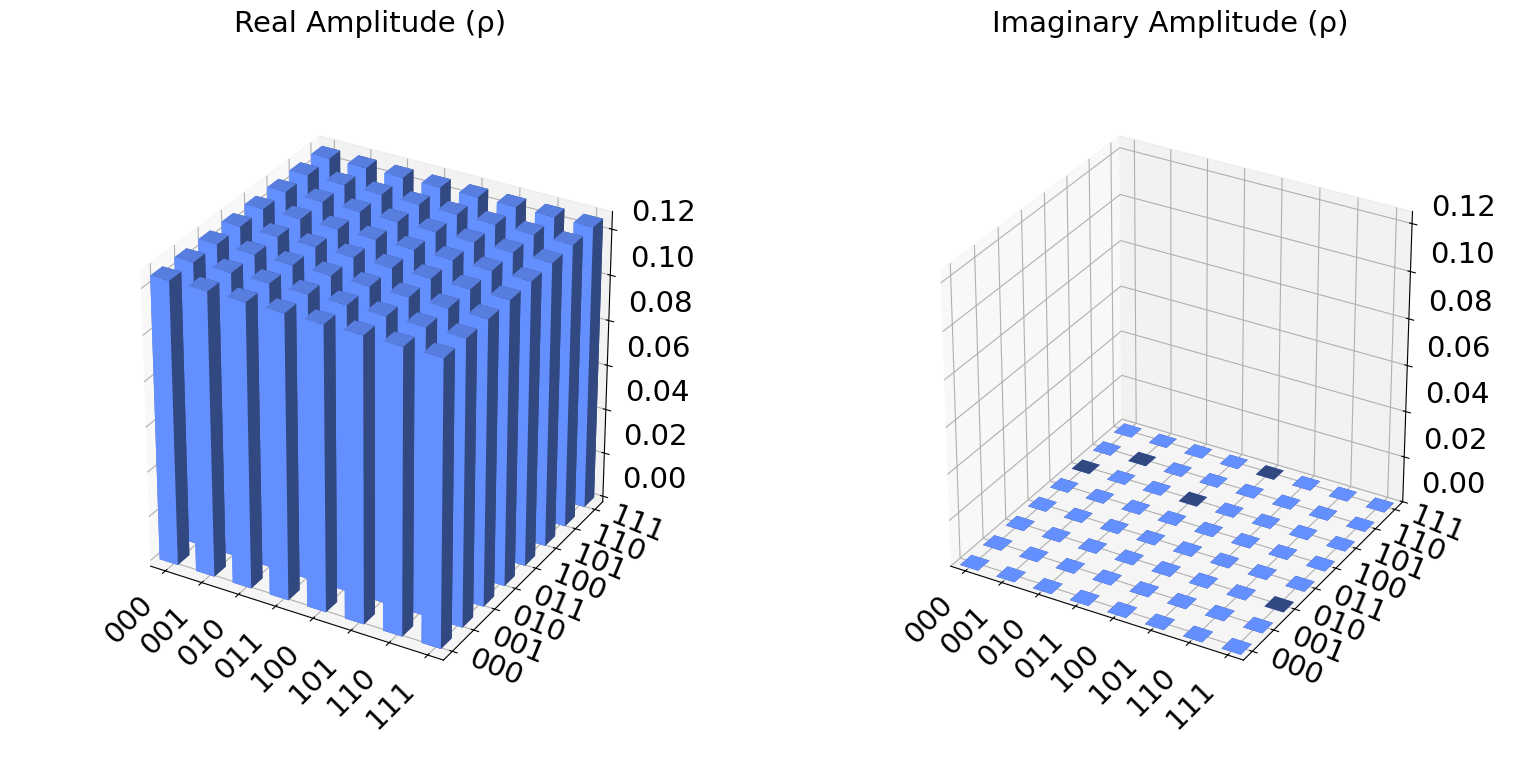

In [9]:
simulator.get_city()

**Circuit Representation**

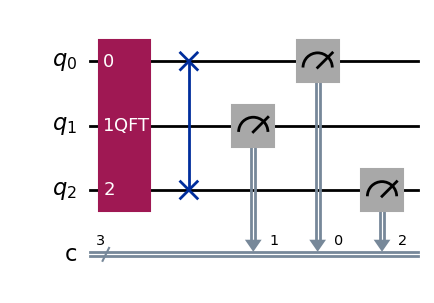

In [10]:
simulator.get_circuit()

**Hinton Representation**

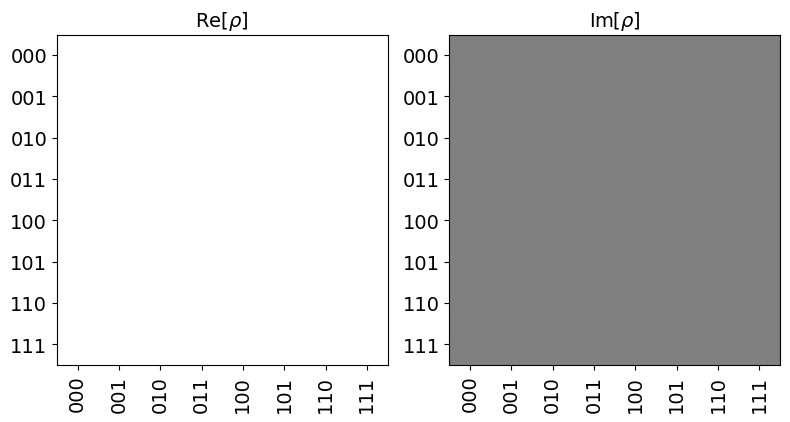

In [11]:
simulator.get_hinton()

**Paulivector Representation**

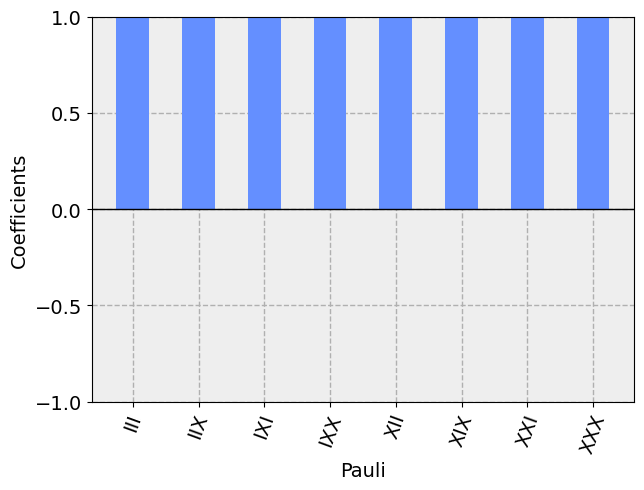

In [12]:
simulator.get_paulivec()

**Bloch sphere Representation**

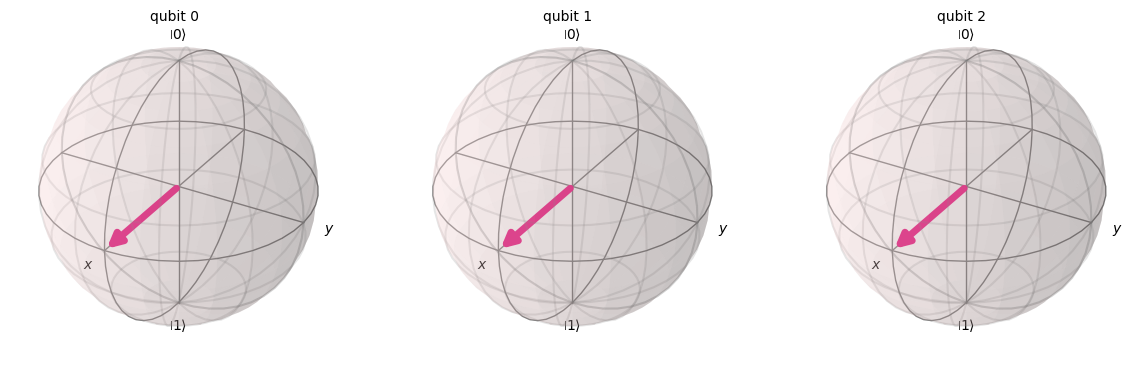

In [13]:
simulator.get_bloch()